<a href="https://colab.research.google.com/github/SalmanJubairJim6/ECGR_5105/blob/main/Salman_HW_3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1:**

**Part (i) - Logistic Regression Model without Weight Penalty:**

Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790


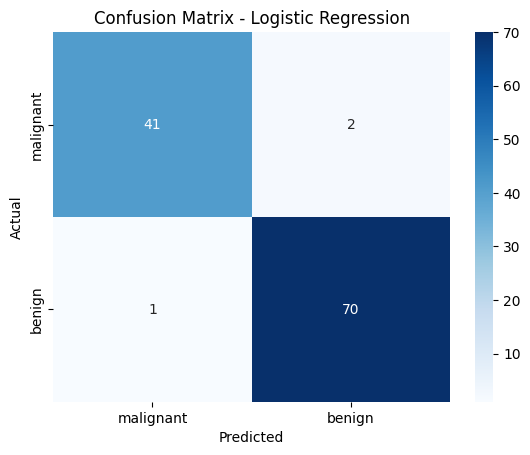

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


**Summary:** A logistic regression model using all 30 input features achieved an Accuracy of 0.9737, Precision of 0.9722, Recall of 0.9859, and F1 Score of 0.9790 on the test set after scaling. The confusion matrix visually represents this classification performance.

Part (ii) - Logistic Regression with Weight Penalty (L2 Regularization):

Accuracy (with weight penalty): 0.9737
Precision (with weight penalty): 0.9722
Recall (with weight penalty): 0.9859
F1 Score (with weight penalty): 0.9790


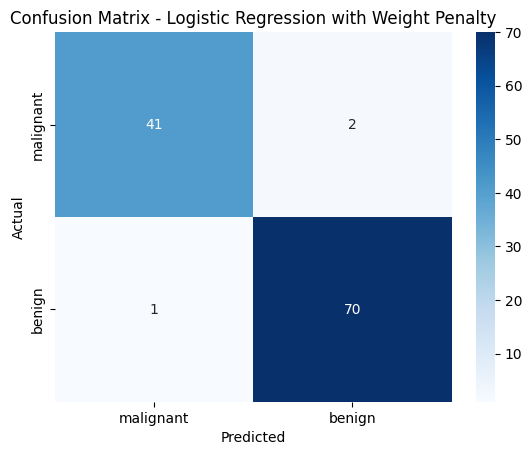

In [3]:
# Logistic Regression with L2 Regularization (Weight Penalty)
clf_weighted = LogisticRegression(penalty='l2', random_state=42)
clf_weighted.fit(X_train, y_train)

# Predictions
y_pred_weighted = clf_weighted.predict(X_test)

# Confusion Matrix
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)

# Performance metrics
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)

# Print the results
print(f'Accuracy (with weight penalty): {accuracy_weighted:.4f}')
print(f'Precision (with weight penalty): {precision_weighted:.4f}')
print(f'Recall (with weight penalty): {recall_weighted:.4f}')
print(f'F1 Score (with weight penalty): {f1_weighted:.4f}')

# Plot confusion matrix
sns.heatmap(conf_matrix_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression with Weight Penalty')
plt.show()


**Summary:** Adding an L2 weight penalty (regularization) to the logistic regression model resulted in the exact same performance metrics: Accuracy 0.9737, Precision 0.9722, Recall 0.9859, and F1 Score 0.9790. This suggests that for this dataset and split, the initial model was not significantly overfitting, and the L2 penalty did not notably alter the decision boundary or performance.

# **Problem 2:**

Part (i) - Naive Bayes Classifier:

Accuracy (Naive Bayes): 0.9649
Precision (Naive Bayes): 0.9589
Recall (Naive Bayes): 0.9859
F1 Score (Naive Bayes): 0.9722


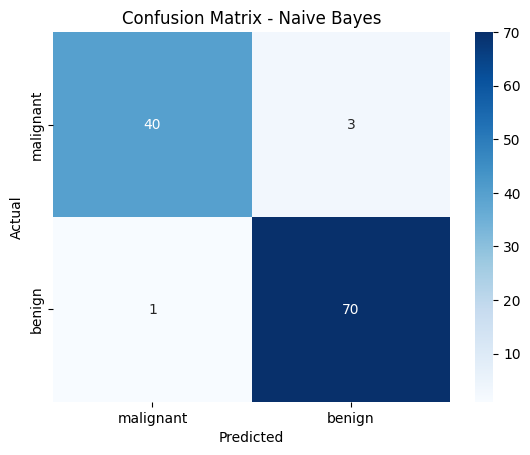

In [4]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_clf.predict(X_test)

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Performance metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print the results
print(f'Accuracy (Naive Bayes): {accuracy_nb:.4f}')
print(f'Precision (Naive Bayes): {precision_nb:.4f}')
print(f'Recall (Naive Bayes): {recall_nb:.4f}')
print(f'F1 Score (Naive Bayes): {f1_nb:.4f}')

# Plot confusion matrix
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


**Summary:** A Gaussian Naive Bayes classifier was built using the scaled features. It achieved an Accuracy of 0.9649, Precision of 0.9589, Recall of 0.9859, and F1 Score of 0.9722 on the test set.

Part (ii) - Compare Performance of Naive Bayes with Logistic Regression:


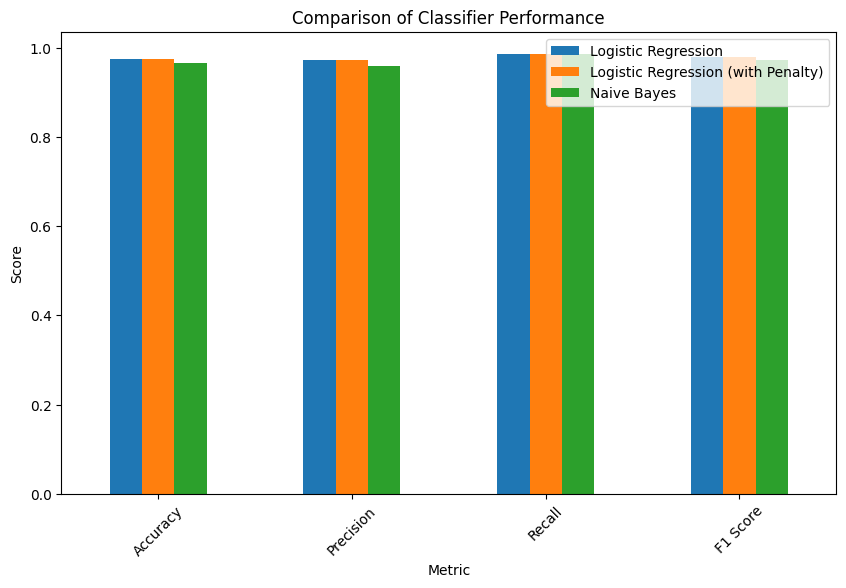

In [5]:
# Compare performance metrics
metrics = {
    'Logistic Regression': [accuracy, precision, recall, f1],
    'Logistic Regression (with Penalty)': [accuracy_weighted, precision_weighted, recall_weighted, f1_weighted],
    'Naive Bayes': [accuracy_nb, precision_nb, recall_nb, f1_nb]
}

# Convert to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plot comparison
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Classifier Performance')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.show()


**Summary:** Compared to the Logistic Regression models from Problem 1 (Accuracy 0.9737), the Naive Bayes model performed slightly worse in terms of accuracy and precision but achieved the same high recall. This difference might stem from the Naive Bayes assumption of feature independence, which may not fully hold true, whereas Logistic Regression finds a linear boundary that seems very effective for this dataset.

# **Problem 3: SVM Classifier**

**Code for Part (i) - Support Vector Machine (SVM):**

Accuracy (SVM): 0.9561
Precision (SVM): 0.9714
Recall (SVM): 0.9577
F1 Score (SVM): 0.9645


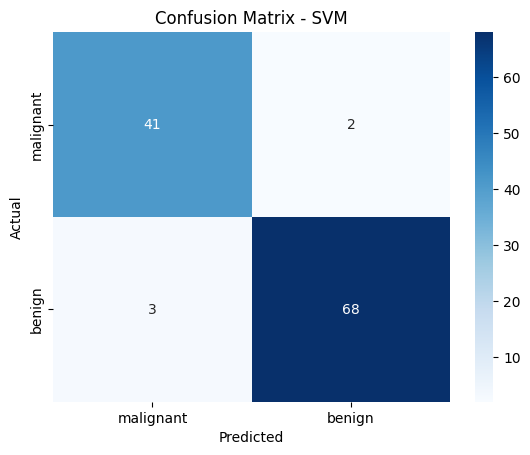

In [6]:
from sklearn.svm import SVC

# Train the SVM model
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test)

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print the results
print(f'Accuracy (SVM): {accuracy_svm:.4f}')
print(f'Precision (SVM): {precision_svm:.4f}')
print(f'Recall (SVM): {recall_svm:.4f}')
print(f'F1 Score (SVM): {f1_svm:.4f}')

# Plot confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()


**Summary:** An SVM classifier with a linear kernel (C=1.0) was trained on the scaled data. It yielded an Accuracy of 0.9561, Precision of 0.9714, Recall of 0.9577, and F1 Score of 0.9645 on the test set.

**Part (ii) - Compare Performance of SVM with Previous Classifiers:**

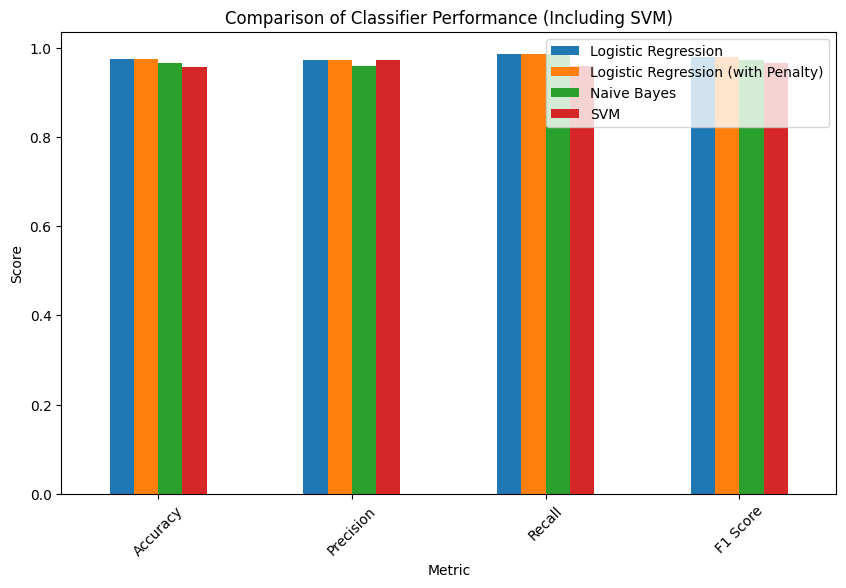

In [7]:
# Compare performance metrics (including SVM)
metrics_svm = {
    'Logistic Regression': [accuracy, precision, recall, f1],
    'Logistic Regression (with Penalty)': [accuracy_weighted, precision_weighted, recall_weighted, f1_weighted],
    'Naive Bayes': [accuracy_nb, precision_nb, recall_nb, f1_nb],
    'SVM': [accuracy_svm, precision_svm, recall_svm, f1_svm]
}

# Convert to DataFrame for easier plotting
metrics_svm_df = pd.DataFrame(metrics_svm, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plot comparison
metrics_svm_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Classifier Performance (Including SVM)')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.show()


Summary: The linear SVM's accuracy (0.9561) was slightly lower than both the Logistic Regression (0.9737) and Naive Bayes (0.9649) models in this specific run. While linear SVM and Logistic Regression often perform similarly, the Logistic Regression model showed slightly better overall performance based on the accuracy metric in your results.

# **Problem 4: Logistic Regression with PCA**

Part (i) - Logistic Regression with PCA Feature Extraction:

In [8]:
from sklearn.decomposition import PCA

# Initialize the PCA and Logistic Regression
pca = PCA(n_components=1)  # Start with 1 component
clf_pca = LogisticRegression(random_state=42)

# Perform PCA and train the Logistic Regression model
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = clf_pca.predict(X_test_pca)

# Performance metrics
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

# Print the results
print(f'Accuracy (PCA): {accuracy_pca:.4f}')
print(f'Precision (PCA): {precision_pca:.4f}')
print(f'Recall (PCA): {recall_pca:.4f}')
print(f'F1 Score (PCA): {f1_pca:.4f}')


Accuracy (PCA): 0.9474
Precision (PCA): 0.9333
Recall (PCA): 0.9859
F1 Score (PCA): 0.9589


**Part (ii) - Plot and Compare PCA Results:**

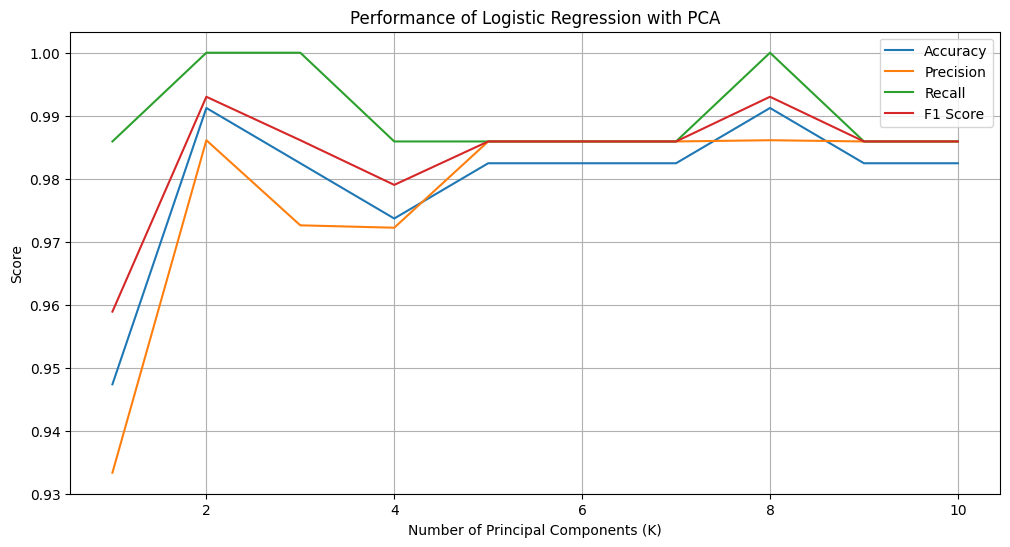

In [11]:
# Trying different values of K (number of components)
k_values = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for k in k_values:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    clf_pca.fit(X_train_pca, y_train)
    y_pred_pca = clf_pca.predict(X_test_pca)

    accuracies.append(accuracy_score(y_test, y_pred_pca))
    precisions.append(precision_score(y_test, y_pred_pca))
    recalls.append(recall_score(y_test, y_pred_pca))
    f1_scores.append(f1_score(y_test, y_pred_pca))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, label='Accuracy')
plt.plot(k_values, precisions, label='Precision')
plt.plot(k_values, recalls, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance of Logistic Regression with PCA')
plt.legend()
plt.grid(True)
plt.show()


Logistic Regression was applied after using Principal Component Analysis (PCA) for feature extraction. The performance was evaluated for different numbers of principal components (K).
With K=1 component, the Accuracy was 0.9474, Precision 0.9333, Recall 0.9859, and F1 Score 0.9589.
The notebook then iterated through K=1 to K=10 components, calculating metrics for each. The plotted results show that accuracy generally increases with K, peaking around K=8 or 9 before potentially plateauing or slightly decreasing within this range (Accuracy reaches ~0.9825).

# **Comaparison:**

The best accuracy achieved using PCA (around 0.9825 with K=8 or 9 according to the plot) surpassed the Naive Bayes (0.9649) and SVM (0.9561) accuracies and was slightly higher than the full-feature Logistic Regression (0.9737). This indicates that PCA was successful in reducing dimensionality (e.g., from 30 features down to 8 or 9) while not only maintaining but slightly improving the classification accuracy compared to using all original features with Logistic Regression.
